In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Load the data

df = pd.read_csv("reviews_data.csv")

df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
df.shape

(99224, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [5]:
df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
#Checking for duplicates

df.duplicated().sum()

0

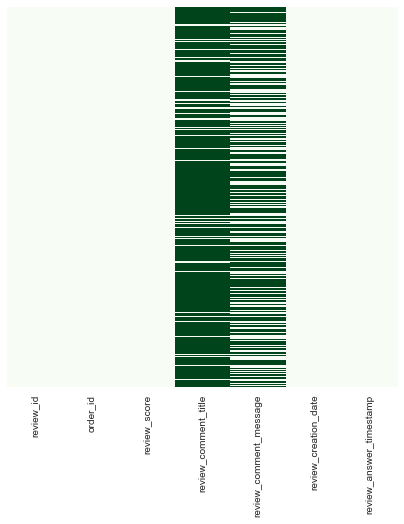

In [7]:
#Visualizing missing values

plt.figure(figsize = (7,7))

sns.heatmap(data = df.isna(),
            cbar = False,
            yticklabels = False,
            cmap = "Greens");

In [8]:
#Quantifying missing values

df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### Data Cleaning & Manipulation

In [9]:
#Changing date columns to "dateformat" dtype

df["review_creation_date"] = pd.to_datetime(df["review_creation_date"]).dt.date

df["review_answer_timestamp"] = pd.to_datetime(df["review_answer_timestamp"]).dt.date

In [10]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02


In [11]:
#Removing unnecessary columns

df = df.drop(columns = ["review_id", "order_id", "review_comment_title", "review_answer_timestamp"])

In [12]:
#Removing missing values

df.dropna(inplace = True)

In [13]:
#Adding column with the length of the reviews

df["review_length"] = df["review_comment_message"].apply(len)

In [14]:
#Reordering columns

df = df[["review_creation_date", "review_comment_message", "review_length", "review_score"]]

df.head()

,review_creation_date,review_comment_message,review_length,review_score
3,2017-04-21,Recebi bem antes do prazo estipulado.,37,5
4,2018-03-01,Parabéns lojas lannister adorei comprar pela I...,100,5
9,2018-05-22,aparelho eficiente. no site a marca do aparelh...,174,4
12,2018-02-16,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",45,4
15,2018-05-23,"Vendedor confiável, produto ok e entrega antes...",56,5


In [15]:
#Creating a "review classification" with the following criteria: Good if above 3 // Bad if equal or below 3 

df["review_classification"] = np.where(df["review_score"] <= 3, "Bad", "Good")

In [16]:
#Changing the name of some columns for better readability

df.rename(columns = {"review_creation_date": "review_date",
                     "review_comment_message": "review"},
          inplace = True)

### Exploratory Data Analysis (EDA)

#### 1. What is the time frame of the reviews?

In [17]:
time_frame = df["review_date"].max() - df["review_date"].min()

time_frame

datetime.timedelta(days=698)

In [18]:
print("The first review was made on",df["review_date"].min(), "and the last on",df["review_date"].max())
print("The time frame of the reviews in the dataset is", round(698/365,1), "years")

The first review was made on 2016-10-02 and the last on 2018-08-31
The time frame of the reviews in the dataset is 1.9 years


#### 2. Are there more good or bad reviews in the dataset?

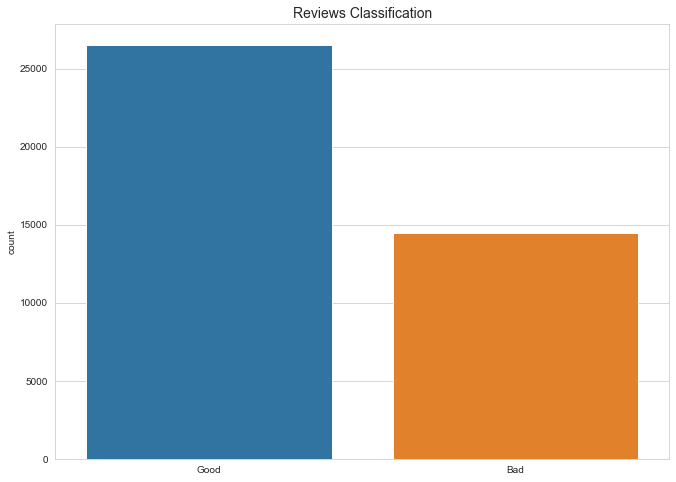

In [19]:
plt.figure(figsize = (11,8))

sns.countplot(data = df,
              x = "review_classification")

plt.title("Reviews Classification", fontsize = 14)
plt.xlabel(None);

We have an unbalanced dataset, since the number of good reviews is much higher than the number of bad reviews.

#### 3. If there are more good reviews than bad reviews, what is the rating distribution?

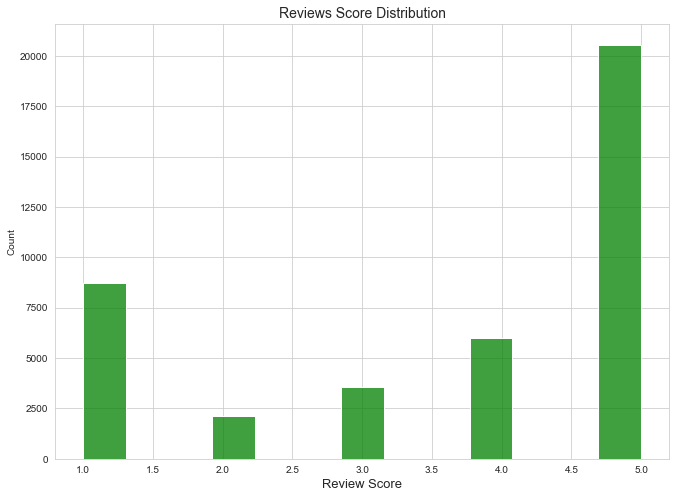

In [20]:
plt.figure(figsize = (11,8))

sns.histplot(data = df,
             bins = 13,
             x = "review_score",
             color = "green")

plt.title("Reviews Score Distribution", fontsize = 14)
plt.xlabel("Review Score", fontsize = 13);

The vast majority of the reviews are really good (5 stars). 


However, the second most frequent score is 1 (very bad), which means that there is a significant amount of unhappy customers. 


It's interesting to have such an uneven distribution of review scores.

#### 4. Is there any correlation between the review score and review length?

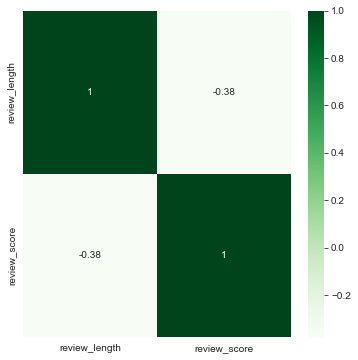

In [21]:
plt.figure(figsize = (6,6))

sns.heatmap(data = df.corr(),
            annot = True,
            cmap = "Greens");

Interestingly enough, it seems that reviews with reviews with better scores tend to be shorter. Let's explore this further.

In [22]:
#Splitting the data into 2 different dataframes

good_reviews = df[df["review_classification"] == "Good"]

bad_reviews = df[df["review_classification"] == "Bad"]

In [23]:
good_reviews.describe()

,review_length,review_score
count,26530.000000,26530.000000
mean,54.068187,4.774746
std,43.934555,0.417758
min,1.000000,4.000000
25%,22.000000,5.000000
50%,43.000000,5.000000
75%,72.000000,5.000000
max,207.000000,5.000000


In [24]:
bad_reviews.describe()

,review_length,review_score
count,14447.000000,14447.000000
mean,95.392607,1.640894
std,59.788198,0.850070
min,1.000000,1.000000
25%,45.000000,1.000000
50%,84.000000,1.000000
75%,144.000000,2.000000
max,208.000000,3.000000


Now we can see that reviews with a bad score are considerably longer than reviews with a good score.


Good reviews (above 3) are about 54 characters long on average, while bad reviews (equal or below 4) are 95 characters long. 



**Let's visualize this with more detail:**

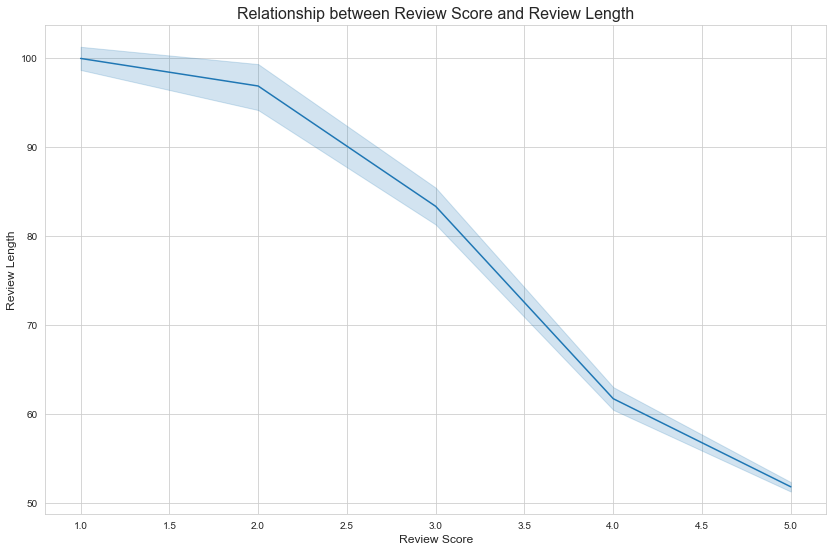

In [25]:
plt.figure(figsize = (14,9))

sns.lineplot(data = df,
             x = "review_score",
             y = "review_length")

plt.title("Relationship between Review Score and Review Length", fontsize = 16)
plt.xlabel("Review Score", fontsize = 12)
plt.ylabel("Review Length", fontsize = 12);

From the lineplot, it is possible to conclude that there is a clear trend: **the better the review score, the shorter the review tends to be.**

#### WordCloud for Good Reviews

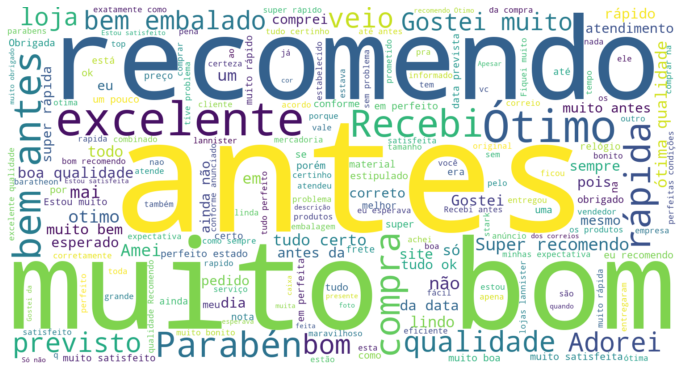

In [26]:
#Creating a string with all the words in the Good Reviews

good_reviews_string = " ".join(word for word in good_reviews["review"])


#Creating a stopwords list

good_reviews_stopwords = set(STOPWORDS)


#Adding some relevant stopwords (in this context) for the list

good_reviews_stopwords.update(["produto", "prazo", "de","o", "e", "que", "para", "ma", "entrega", "entregue", "chegou", "mas", "é", 
                               "foi", "dentro", "ante"])


#Generating a WordCloud

wordcloud = WordCloud(stopwords = good_reviews_stopwords,
                      background_color = "white",
                      max_words = 200,
                      height = 800,
                      width = 1500).generate(good_reviews_string)

plt.figure(figsize = (12,10))
plt.imshow(wordcloud,
           interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Wordcloud for Bad Reviews

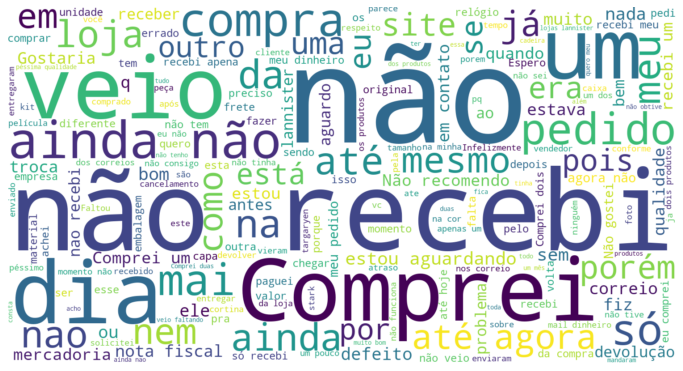

In [27]:
#Creating a string with all the words in the Good Reviews

bad_reviews_string = " ".join(word for word in bad_reviews["review"])

#Creating a stopwords list

bad_reviews_stopwords = set(STOPWORDS)


#Adding some relevant stopwords (in this context) for the list

bad_reviews_stopwords.update(["produto", "prazo", "de","o", "e", "que", "para", "ma", "entrega", "entregue", "chegou", "mas", "é", 
                               "foi", "dentro", "ante"])


#Generating a WordCloud

wordcloud = WordCloud(stopwords = bad_reviews_stopwords,
                      background_color = "white",
                      max_words = 200,
                      height = 800,
                      width = 1500).generate(bad_reviews_string)

plt.figure(figsize = (12,10))
plt.imshow(wordcloud,
           interpolation = "bilinear")
plt.axis("off")
plt.show()

Based on the WordCloud for Good Reviews, we can clearly see that the overall sentiment is that the customers received their orders fast, some of them even received them before the scheduled date.

Regarding the sentiment in the Bad Reviews WordCloud, the most common expressions are "didn't receive" or "still haven't received". The word "not" is used very often, which probably means that the delivery is not adequate to their needs and expectations.

### Data Preprocessing

In [28]:
#Remove every column other than the reviews and it's score

final_df = df[["review", "review_score", "review_length"]].reset_index()

final_df = final_df.drop(columns = "index")

In [29]:
final_df

,review,review_score,review_length
0,Recebi bem antes do prazo estipulado.,5,37
1,Parabéns lojas lannister adorei comprar pela I...,5,100
2,aparelho eficiente. no site a marca do aparelh...,4,174
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,45
4,"Vendedor confiável, produto ok e entrega antes...",5,56
...,...,...,...
40972,para este produto recebi de acordo com a compr...,4,58
40973,Entregou dentro do prazo. O produto chegou em ...,5,91
40974,"O produto não foi enviado com NF, não existe v...",3,125
40975,"Excelente mochila, entrega super rápida. Super...",5,67


In [30]:
#Checking some random review

final_df["review"][40973]

'Entregou dentro do prazo. O produto chegou em condições perfeitas. Estou muito satisfeita! '

In [31]:
#Importing NLTK libraries

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize


In [32]:
#Creating a function to preprocess text in the reviews

def review_preprocessing(text):
    text = text.lower()  #converting every word to lowercase
    
    tokens = word_tokenize(text) #tokenizing
    
    stopwords_language = stopwords.words("portuguese") 
    
    #Removing unicode characters, punctuation and stopwords
    tokens = [token for token in tokens if not token.isdigit() and \
              not token in string.punctuation and \
              token not in stopwords_language]
    
    stemmer = SnowballStemmer("portuguese")
    tokens = [stemmer.stem(token) for token in tokens]  #stemming tokens
    
    preprocessed_text = " ".join(tokens)  #join tokens and form a string
    
    return preprocessed_text

In [33]:
#Applying the function to the reviews

final_df["clean_review"] = final_df["review"].apply(review_preprocessing)

In [34]:
#Creating a "length" column to the clean reviews for comparison

final_df["clean_review_length"] = final_df["clean_review"].apply(len)

In [35]:
final_df.head()

,review,review_score,review_length,clean_review,clean_review_length
0,Recebi bem antes do prazo estipulado.,5,37,receb bem antes praz estipul,28
1,Parabéns lojas lannister adorei comprar pela I...,5,100,parabéns loj lannist ador compr internet segur...,78
2,aparelho eficiente. no site a marca do aparelh...,4,174,aparelh eficient sit marc aparelh impress 3des...,104
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,45,pouc trav ... valor ta boa,26
4,"Vendedor confiável, produto ok e entrega antes...",5,56,vendedor confiável produt ok entreg antes praz,46


In [36]:
#Comparing length of normal reviews vs clean reviews

review_length = " ".join(word for word in final_df["review"])

clean_review_length = " ".join(word for word in final_df["clean_review"])

print("There are {} words in the normal Reviews.".format(len(review_length)))
print("There are {} words in the clean Reviews.".format(len(clean_review_length)))
print(f"There is a difference of {abs(len(clean_review_length) - len(review_length))} words after cleaning the reviews.")

There are 2853542 words in the normal Reviews.
There are 1733147 words in the clean Reviews.
There is a difference of 1120395 words after cleaning the reviews.


### Modelling

In [37]:
#Importing scikit-learn libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
#Tf-idf

tfidf = TfidfVectorizer(max_features = 20000,
                        ngram_range = (1,3),
                        analyzer = "char")

In [39]:
#Create X & Y

X = tfidf.fit_transform(final_df["clean_review"])

y = final_df["review_score"]

In [40]:
#Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 45)

#### Logistic Regression

In [41]:
#Fit the model to our data

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
#Making predictions

lr_preds = lr.predict(X_test)

In [43]:
#Evaluating the model

print("Accuracy Score:", round(accuracy_score(y_test, lr_preds),2))
print("\n")
print("Classification Report:", "\n", classification_report(y_test, lr_preds))

Accuracy Score: 0.68


Classification Report: 
               precision    recall  f1-score   support

           1       0.64      0.87      0.74      2209
           2       0.12      0.01      0.01       504
           3       0.33      0.12      0.18       895
           4       0.33      0.08      0.13      1513
           5       0.74      0.94      0.83      5124

    accuracy                           0.68     10245
   macro avg       0.43      0.40      0.38     10245
weighted avg       0.59      0.68      0.61     10245



In [44]:
final_df["review"][25]

'Ocorreu tudo como contratado sendo a entrega realizada antes do prazo \r\n Estou satisfeita\r\n'

In [45]:
#Creating 2 random reviews (1 good, 1 bad,1 intermediate)

good_review = "A entrega foi efetuada antes do prazo e estava tudo em ótimas condições. Estou bastante satisfeito."

intermediate_review = "Embora a entrega tenha sido efetuada a tempo, o produto não estava em boas condições. O serviço podia ser um pouco melhor."

bad_review = "Não recebi o produto. Fiz a encomenda há três meses atrás e não recebi nada. O serviço é péssimo."


In [46]:
#Evaluting the model (Logistic Regression) on the 3 reviews

good_review_vec = tfidf.transform([good_review])

intermediate_review_vec = tfidf.transform([intermediate_review])

bad_review_vec = tfidf.transform([bad_review])

print("Good Review Star Rating Prediction:", lr.predict(good_review_vec))

print("Intermediate Review Star Rating Prediction:", lr.predict(intermediate_review_vec))

print("Bad Review Star Rating Prediction:", lr.predict(bad_review_vec))


Good Review Star Rating Prediction: [5]
Intermediate Review Star Rating Prediction: [4]
Bad Review Star Rating Prediction: [1]


#### LinearSVC

In [47]:
#Fit the model to our data

svc = LinearSVC()

svc.fit(X_train, y_train)

LinearSVC()

In [48]:
#Making predictions

svc_predictions = svc.predict(X_test)

In [49]:
#Evaluating the model

print("Accuracy Score:", round(accuracy_score(y_test, svc_predictions),2))
print("\n")
print("Classification Report:", "\n", classification_report(y_test, svc_predictions))

Accuracy Score: 0.67


Classification Report: 
               precision    recall  f1-score   support

           1       0.65      0.84      0.73      2209
           2       0.16      0.03      0.06       504
           3       0.30      0.13      0.18       895
           4       0.30      0.08      0.12      1513
           5       0.74      0.94      0.83      5124

    accuracy                           0.67     10245
   macro avg       0.43      0.40      0.38     10245
weighted avg       0.59      0.67      0.61     10245



In [50]:
#Evaluting the model (LinearSVC) on the 3 reviews


print("Good Review Star Rating Prediction:", svc.predict(good_review_vec))

print("Intermediate Review Star Rating Prediction:",  svc.predict(intermediate_review_vec))

print("Bad Review Star Rating Prediction:", svc.predict(bad_review_vec))

Good Review Star Rating Prediction: [5]
Intermediate Review Star Rating Prediction: [4]
Bad Review Star Rating Prediction: [1]


#### Random Forest Classifier

In [51]:
#Fit the model to our data

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
#Making predictions

rfc_predictions = rfc.predict(X_test)

In [53]:
#Evaluating the model

print("Accuracy Score:", round(accuracy_score(y_test, rfc_predictions),2))
print("\n")
print("Classification Report:", "\n", classification_report(y_test, rfc_predictions))

Accuracy Score: 0.66


Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.84      0.69      2209
           2       0.46      0.03      0.05       504
           3       0.44      0.04      0.07       895
           4       0.40      0.05      0.09      1513
           5       0.71      0.94      0.81      5124

    accuracy                           0.66     10245
   macro avg       0.52      0.38      0.34     10245
weighted avg       0.60      0.66      0.58     10245



In [54]:
#Evaluting the model (Random Forest Classifier) on the 3 reviews


print("Good Review Star Rating Prediction:", rfc.predict(good_review_vec))

print("Intermediate Review Star Rating Prediction:",  rfc.predict(intermediate_review_vec))

print("Bad Review Star Rating Prediction:", rfc.predict(bad_review_vec))

Good Review Star Rating Prediction: [5]
Intermediate Review Star Rating Prediction: [1]
Bad Review Star Rating Prediction: [1]


**We built 3 classification models for Review Star Rating prediction with an accuracy of 66% - 68%. Although the results are not amazing, there is still room for improvement since we used "off-the-shelf" parameters for all 3 models.**

**This project, with some improvements, can add a lot of business value to any company who wants to generate more revenue by improving their online reputation. Furthermore, the Exploratory Data Analysis offers valuable and actionable insights for better decision-making of all the relevant stakeholders.**